In [ ]:
#importación de la base de datos de iris
import pandas as pd
df=pd.read_csv("Iris.csv", ",")
df.head()

In [ ]:
df.shape

In [ ]:
df.describe()

Una base de datos de 150 observaciones, donde se encuentra las especies de una flor y caracteristicas, que son medidas de los petalos y tallos  Como se ve la base de datos esta completa

In [ ]:
#Histograma de las variables continuas
df.SepalLengthCm.hist()

In [ ]:
df.SepalWidthCm.hist()

In [ ]:
df.PetalLengthCm.hist()

In [ ]:
df.PetalWidthCm.hist()

In [ ]:
#Histograma de variable categorica
import seaborn as sb
sb.factorplot('Species',data=df,kind="count", aspect=2)

In [ ]:
#Definición de la x
x=df.drop(["Species"], axis=1)
x.head()

In [ ]:
#Definicion de y
y=df["Species"]
y.head()

In [148]:
#Separa la base de datos
from sklearn.model_selection import train_test_split
xEntreno, xTest, yEntreno, yTest = train_test_split(x, y, test_size=0.3, random_state=0,shuffle=True)
#xEntreno la matriz de atributos de entrenamiento
#yEntreno la clase de entrenamiento
#xTest la matirz de atributos de testeo
#yTest la clase de testeo

K-Nearest Neighbor 

In [149]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
xEntreno = scaler.fit_transform(xEntreno)
xTest = scaler.transform(xTest)

In [163]:
from sklearn.neighbors import KNeighborsClassifier
nvecinos=105
KNN = KNeighborsClassifier(nvecinos)
KNN.fit(xEntreno,yEntreno)
print('la precisión de la clasificacion KNN en el conjunto de entrenamiento: {:.2f}'
     .format(KNN.score(xEntreno, yEntreno)))
print('la precisión de la clasificacion KNN en conjunto de testeo: {:.2f}'
     .format(KNN.score(xTest, yTest)))

la precisión de la clasificacion KNN en el conjunto de entrenamiento: 0.37
la precisión de la clasificacion KNN en conjunto de testeo: 0.24


In [151]:
#Predicción
yhat=KNN.predict(xTest)

In [ ]:
#Probabilidad de yhat
print(KNN.predict_proba(xTest))

In [ ]:
import numpy as np
r=[]
for i in range(0,len(yTest)):
  if yhat[i]==yTest.values[i]:
      r.append(yhat[i])
r

In [154]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(yTest, yhat))
print(classification_report(yTest, yhat))

[[ 0  0 16]
 [ 0  0 18]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       0.00      0.00      0.00        16
Iris-versicolor       0.00      0.00      0.00        18
 Iris-virginica       0.24      1.00      0.39        11

       accuracy                           0.24        45
      macro avg       0.08      0.33      0.13        45
   weighted avg       0.06      0.24      0.10        45



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


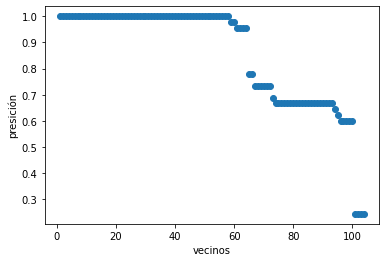

In [156]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatche
vecinos=range(1,105)
puntaje=[]
for j in vecinos:
  KNN=KNeighborsClassifier(n_neighbors = j)
  KNN.fit(xEntreno, yEntreno)
  puntaje.append(KNN.score(xTest, yTest))
plt.figure()
plt.xlabel("vecinos")
plt.ylabel("presición")
plt.scatter(vecinos,puntaje)

In [179]:
#KNN con otros parametros
KNN2 = KNeighborsClassifier(n_neighbors= 105, weights="distance", algorithm="kd_tree", metric="euclidean")
KNN2.fit(xEntreno,yEntreno)
print('la precisión de la clasificacion KNN2 en el conjunto de entrenamiento: {:.2f}'.format(KNN2.score(xEntreno, yEntreno)))
print('la precisión de la clasificacion KNN2 en conjunto de testeo: {:.2f}'.format(KNN2.score(xTest, yTest)))

la precisión de la clasificacion KNN2 en el conjunto de entrenamiento: 1.00
la precisión de la clasificacion KNN2 en conjunto de testeo: 1.00


In [180]:
#predicción
yhat2=KNN2.predict(xTest)

In [ ]:
#probabilidad
print(KNN2.predict_proba(xTest))

In [ ]:
import numpy as np
r2=[]
for i in range(0,len(yTest)):
  if yhat2[i]==yTest.values[i]:
      r2.append(yhat2[i])
r2

In [183]:
print(confusion_matrix(yTest, yhat2))
print(classification_report(yTest, yhat2))

[[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      1.00      1.00        18
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



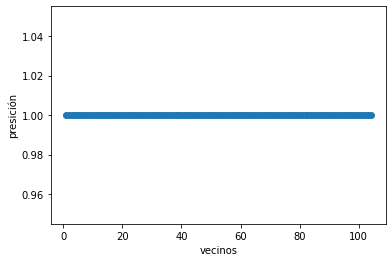

In [185]:
vecinos2=range(1,105)
puntaje2=[]
for j in vecinos2:
  KNN2=KNeighborsClassifier(n_neighbors = j,weights="distance", algorithm="kd_tree", metric="euclidean")
  KNN2.fit(xEntreno, yEntreno)
  puntaje2.append(KNN2.score(xTest, yTest))
plt.figure()
plt.xlabel("vecinos")
plt.ylabel("presición")
plt.scatter(vecinos2,puntaje2)

In [190]:
#KNN con otros parametros
KNN3 = KNeighborsClassifier(n_neighbors= 105, weights="distance", algorithm="ball_tree", metric="minkowski")
KNN3.fit(xEntreno,yEntreno)
print('la precisión de la clasificacion KNN3 en el conjunto de entrenamiento: {:.2f}'.format(KNN3.score(xEntreno, yEntreno)))
print('la precisión de la clasificacion KNN3 en conjunto de testeo: {:.2f}'.format(KNN3.score(xTest, yTest)))

la precisión de la clasificacion KNN3 en el conjunto de entrenamiento: 1.00
la precisión de la clasificacion KNN3 en conjunto de testeo: 1.00


In [191]:
yhat3=KNN3.predict(xTest)
#predicción 

In [ ]:
#probabilidad
print(KNN3.predict_proba(xTest))

In [ ]:
r3=[]
for i in range(0,len(yTest)):
  if yhat3[i]==yTest.values[i]:
      r3.append(yhat3[i])
r3

In [194]:
print(confusion_matrix(yTest, yhat3))
print(classification_report(yTest, yhat3))

[[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      1.00      1.00        18
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



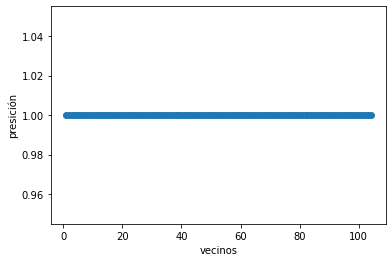

In [195]:
vecinos3=range(1,105)
puntaje3=[]
for j in vecinos3:
  KNN3=KNeighborsClassifier(n_neighbors = j,weights="distance", algorithm="ball_tree", metric="minkowski")
  KNN3.fit(xEntreno, yEntreno)
  puntaje3.append(KNN3.score(xTest, yTest))
plt.figure()
plt.xlabel("vecinos")
plt.ylabel("presición")
plt.scatter(vecinos3,puntaje3)

Ramdon Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=100, bootstrap = True, verbose=2, max_features = 'sqrt')
RFC.fit(xEntreno,yEntreno)

In [ ]:
print('la precisión de la clasificacion RFC en el conjunto de entrenamiento: {:.2f}'.format(RFC.score(xEntreno, yEntreno)))
print('la precisión de la clasificacion RFC en conjunto de testeo: {:.2f}'.format(RFC.score(xTest, yTest)))

In [210]:
#predicción
yhat4=RFC.predict(xTest)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [ ]:
#probabilidad
print(RFC.predict_proba(xTest))

In [ ]:
r4=[]
for i in range(0,len(yTest)):
  if yhat4[i]==yTest.values[i]:
      r4.append(yhat4[i])
r4

In [202]:
print(confusion_matrix(yTest, yhat4))
print(classification_report(yTest, yhat4))

[[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      1.00      1.00        18
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



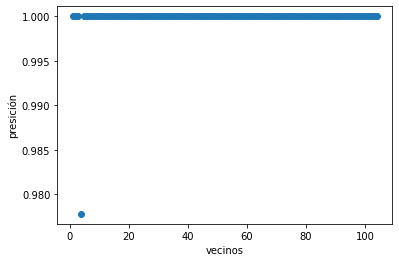

In [224]:
vecinos4=range(1,105)
puntaje4=[]
for j in vecinos4:
  RFC=RandomForestClassifier(n_estimators=j)
  RFC.fit(xEntreno, yEntreno)
  puntaje4.append(RFC.score(xTest, yTest))
plt.figure()
plt.xlabel("vecinos")
plt.ylabel("presición")
plt.scatter(vecinos4,puntaje4)

In [ ]:
# Ramdon Forest Clasificació con otros parametros
RFC2 = RandomForestClassifier(n_estimators=100, bootstrap = False, verbose=2, max_features = 'log2')
RFC2.fit(xEntreno,yEntreno)

In [209]:
print('la precisión de la clasificacion RFC2 en el conjunto de entrenamiento: {:.2f}'.format(RFC2.score(xEntreno, yEntreno)))
print('la precisión de la clasificacion RFC2 en conjunto de testeo: {:.2f}'.format(RFC2.score(xTest, yTest)))

la precisión de la clasificacion RFC2 en el conjunto de entrenamiento: 1.00
la precisión de la clasificacion RFC2 en conjunto de testeo: 1.00


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [232]:
yhat5=RFC2.predict(xTest)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 104 out of 104 | elapsed:    0.0s finished


In [ ]:
print(RFC2.predict_proba(xTest))

In [ ]:
r5=[]
for i in range(0,len(yTest)):
  if yhat5[i]==yTest.values[i]:
      r5.append(yhat5[i])
r5

In [214]:
print(confusion_matrix(yTest, yhat5))
print(classification_report(yTest, yhat5))

[[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      1.00      1.00        18
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



In [ ]:
vecinos5=range(1,105)
puntaje5=[]
for j in vecinos5:
  RFC2=RandomForestClassifier(n_estimators=j,bootstrap = False, verbose=2, max_features = 'log2')
  RFC2.fit(xEntreno, yEntreno)
  puntaje5.append(RFC2.score(xTest, yTest))
plt.figure()
plt.xlabel("vecinos")
plt.ylabel("presición")
plt.scatter(vecinos5,puntaje5)

In [ ]:
RFC3 = RandomForestClassifier(n_estimators=100, bootstrap = False, verbose=2, max_features = 'auto')
RFC3.fit(xEntreno,yEntreno)

In [227]:
print('la precisión de la clasificacion RFC3 en el conjunto de entrenamiento: {:.2f}'.format(RFC3.score(xEntreno, yEntreno)))
print('la precisión de la clasificacion RFC3 en conjunto de testeo: {:.2f}'.format(RFC3.score(xTest, yTest)))

la precisión de la clasificacion RFC3 en el conjunto de entrenamiento: 1.00
la precisión de la clasificacion RFC3 en conjunto de testeo: 1.00


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [229]:
yhat6=RFC3.predict(xTest)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [ ]:
print(RFC3.predict_proba(xTest))

In [ ]:
r6=[]
for i in range(0,len(yTest)):
  if yhat6[i]==yTest.values[i]:
      r6.append(yhat6[i])
r6

In [236]:
print(confusion_matrix(yTest, yhat))
print(classification_report(yTest, yhat6))

[[ 0  0 16]
 [ 0  0 18]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      1.00      1.00        18
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



In [ ]:
vecinos6=range(1,105)
puntaje6=[]
for j in vecinos5:
  RFC3=RandomForestClassifier(n_estimators=j, bootstrap = False, verbose=2, max_features = 'auto')
  RFC3.fit(xEntreno, yEntreno)
  puntaje6.append(RFC3.score(xTest, yTest))
plt.figure()
plt.xlabel("vecinos")
plt.ylabel("presición")
plt.scatter(vecinos6,puntaje6)

Graficas de los arboles

In [242]:
#se importa la función necesaria para exportar el árbol
from sklearn.tree import export_graphviz
import pydot
arbol = RFC.estimators_[2] #se crea el arbol con dos estimadores
arbol

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=62534433, splitter='best')

In [243]:
export_graphviz(arbol, out_file = 'arbol.dot',rounded = True, precision = 1)
(grafica, ) = pydot.graph_from_dot_file('arbol.dot')
grafica.write_png('arbol.png')

In [244]:
arbol2 = RFC2.estimators_[2] #se crea el arbol con dos estimadores
arbol2

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1611630286, splitter='best')

In [245]:
export_graphviz(arbol2, out_file = 'arbol2.dot',rounded = True, precision = 1)
(grafica, ) = pydot.graph_from_dot_file('arbol2.dot')
grafica.write_png('arbol2.png')

In [246]:
arbol3 = RFC3.estimators_[2] #se crea el arbol con dos estimadores
arbol3

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=980027607, splitter='best')

In [247]:
export_graphviz(arbol3, out_file = 'arbol3.dot',rounded = True, precision = 1)
(grafica, ) = pydot.graph_from_dot_file('arbol3.dot')
grafica.write_png('arbol3.png')